### Import modules

In [39]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import matplotlib
import matplotlib.pyplot as plt
# # change directory to 'master_study/analysis'
# os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'


In [40]:
# Define study
STUDY_NAME = "fig5_sofia"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0123/config_final.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
#df = df.round(3)

# Keep only relevant collider
#df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df


normalized amplitude in xy-plane  \
beam  name base collider on_x1 on_x2v on_x5 on_x8h num_particles_per_bunch                                     
lhcb1 base_collider      70.0  70.0   70.0  35.0   6.929488e+07                                     11.18750   
                                                   6.934881e+07                                     10.87500   
                                                   6.941138e+07                                     10.93750   
                                                   6.947104e+07                                     11.15625   
                                                   6.952017e+07                                     10.71875   
...                                                                                                      ...   
                         170.0 170.0  170.0 135.0  7.600758e+07                                     11.15625   
                                                   7.607271e+07                                     11.34375   
                                                   7.613571e+07                                     10.93750   
                                                   7.620539e+07                                     11.34375   
                                                   7.626499e+07                                     11.18750   

                                                                               qx  \
beam  name base collider on_x1 on_x2v on_x5 on_x8h num_particles_per_bunch          
lhcb1 base_collider      70.0  70.0   70.0  35.0   6.929488e+07             62.31   
                                                   6.934881e+07             62.31   
                                                   6.941138e+07             62.31   
                                                   6.947104e+07             62.31   
                                                   6.952017e+07             62.31   
...                                                                           ...   
                         170.0 170.0  170.0 135.0  7.600758e+07             62.31   
                                                   7.607271e+07             62.31   
                                                   7.613571e+07             62.31   
                                                   7.620539e+07             62.31   
                                                   7.626499e+07             62.31   

                                                                               qy  \
beam  name base collider on_x1 on_x2v on_x5 on_x8h num_particles_per_bunch          
lhcb1 base_collider      70.0  70.0   70.0  35.0   6.929488e+07             60.32   
                                                   6.934881e+07             60.32   
                                                   6.941138e+07             60.32   
                                                   6.947104e+07             60.32   
                                                   6.952017e+07             60.32   
...                                                                           ...   
                         170.0 170.0  170.0 135.0  7.600758e+07             60.32   
                                                   7.607271e+07             60.32   
                                                   7.613571e+07             60.32   
                                                   7.620539e+07             60.32   
                                                   7.626499e+07             60.32   

                                                                             dqx  \
beam  name base collider on_x1 on_x2v on_x5 on_x8h num_particles_per_bunch         
lhcb1 base_collider      70.0  70.0   70.0  35.0   6.929488e+07             10.0   
                                                   6.934881e+07             10.0   
                                                   6.941138e+07        

In [41]:
# Crop df for sigma_z under 0.0775
df = df[df["sigma_z"] > 0.0775]

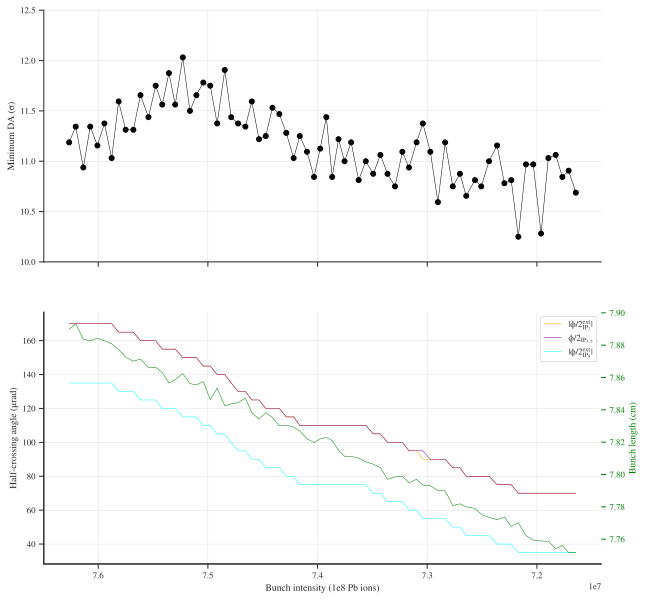

In [65]:
# Make two vertical subplots containing line plots:
# First one is the normalized amplitude in xy-plane vs bunch intensity
# Second one is on_x1, on_x2v, on_x5, on_x8h and bunch length vs bunch intensity
# Share x-axis

# Create figure
fix, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First subplot
axs[0].plot(df["num_particles_per_bunch"], df["normalized amplitude in xy-plane"], color='black', linestyle='-', marker='o', markersize=5, label='Minimum DA')
axs[0].set_ylim(10, 12.5)

# Second subplot
axs[1].plot(df["num_particles_per_bunch"], df["on_x2v"], label=r"$|\phi/2_{IP_{2}}^{ext}|$", color = 'Orange')
axs[1].plot(df["num_particles_per_bunch"], df["on_x1"], label=r"$\phi/2_{IP_{1,5}}$", color = 'Purple')
#axs[1].plot(df["num_particles_per_bunch"], df["on_x5"], label="on_x5")
axs[1].plot(df["num_particles_per_bunch"], df["on_x8h"], label=r"$|\phi/2_{IP_{8}}^{ext}|$", color = 'cyan')
#axs[1].plot(df["num_particles_per_bunch"], df["sigma_z"], label="bunch_length")

# Plot bunch length on a secondary y-axis
axs2 = axs[1].twinx()
axs2.plot(df["num_particles_per_bunch"], df["sigma_z"]*100, label="bunch_length", color="green")

# Make secondaries y-axis visible
axs2.spines['right'].set_color('green')
axs2.yaxis.label.set_color('green')
axs2.tick_params(axis='y', colors='green')

# Reverse x-axis
plt.gca().invert_xaxis()

# Set labels
axs[0].set_ylabel(r"Minimum DA ($\sigma$)")
axs[1].set_ylabel(r"Half-crossing angle ($\mu$rad)")
axs[1].set_xlabel("Bunch intensity (1e8 Pb ions)")
axs2.set_ylabel("Bunch length (cm)")

# Set legend
# axs[0].legend()
axs[1].legend()

# Add grid
axs[0].grid()
axs[1].grid()

plt.savefig("plots/fig5_sofia.pdf")
plt.show()


